# L3-05
## NEHAL MAHENDRA RANE
### Problem Statement: Implement Quantum Phase Estimation to approximate eigenvalues.

In [1]:
!pip install qiskit
!pip install numpy
!pip install matplotlib
!pip install --upgrade qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.8 MB/s eta 0:00:00


In [17]:
# Imports
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np


In [18]:

# Function to create a controlled unitary operation
def controlled_unitary(circuit, theta, control_qubit, target_qubit):
    circuit.ry(theta, target_qubit)
    # Replace cu1 with cp
    circuit.cp(-theta, control_qubit, target_qubit) # cu1 is deprecated, use cp instead




In [19]:
# Function to implement Quantum Phase Estimation
def quantum_phase_estimation(theta, num_qubits):
    circuit = QuantumCircuit(num_qubits + 1, num_qubits)

    # Initialize the ancilla qubit to |+>
    circuit.h(num_qubits)

    # Apply controlled unitary operations
    for i in range(num_qubits):
        controlled_unitary(circuit, theta, num_qubits - i - 1, num_qubits)

    # Apply inverse QFT
    # Correct the inverse QFT implementation
    circuit.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Measurement
    circuit.measure(range(num_qubits), range(num_qubits))

    return circuit


In [20]:
from qiskit.circuit.library import QFT # Import QFT

In [21]:
# Parameters
theta = np.pi / 4  # Example angle
num_qubits = 3


In [22]:
# Create the circuit
circuit = quantum_phase_estimation(theta, num_qubits)

In [23]:
# Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'])


In [24]:
# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpiled_circuit).result()


In [26]:
# Get the counts
counts = result.get_counts(circuit)
print(counts)


{'100': 119, '110': 126, '001': 124, '101': 143, '011': 115, '111': 133, '000': 131, '010': 133}


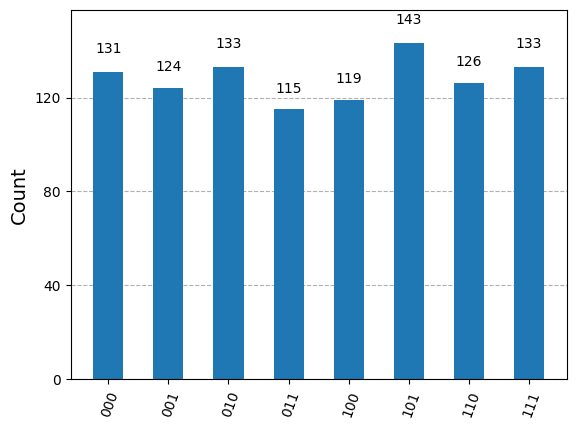

In [27]:
# Plot the histogram
plot_histogram(counts)